In [ ]:
!pip install mglearn

# Tree 계열 알고리즘
* 의사결정트리 (Decision Tree)

# 앙상블 모델
* 랜덤 포레스트( Random Forest )
* 그라디언트 부스팅 회귀 트리( Gradient Boosting Regressor Tree )

# 트리 알고리즘의 특징
1. 데이터를 토대로 질문지를 만들어 낸다.
  * 항상 이 질문은 YES / NO 로 결정 된다.
  * 질문지를 만들어 내는 기준은 지니계수가 높은 것을 기준으로 만들어 낸다.
2. 질문지는 노드( 리프 )로 구성되어 있다.
3. 더 이상 질문을 할 수 없는 - 지니계수가 0인 노드를 **순수 노드(pure node)**라고 한다.

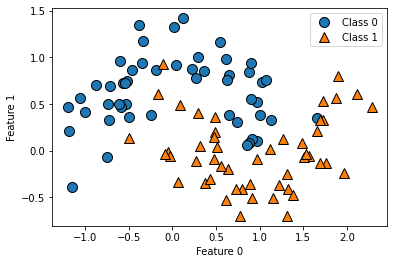

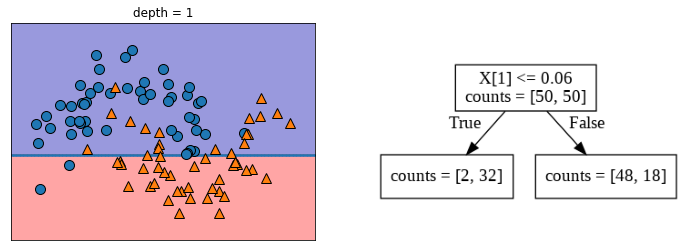

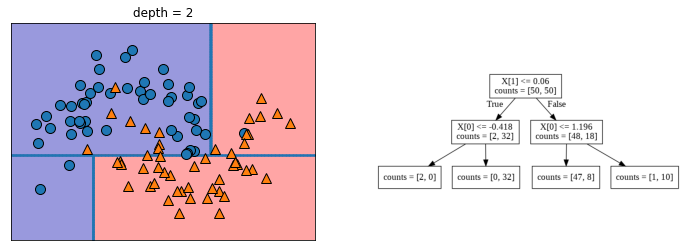

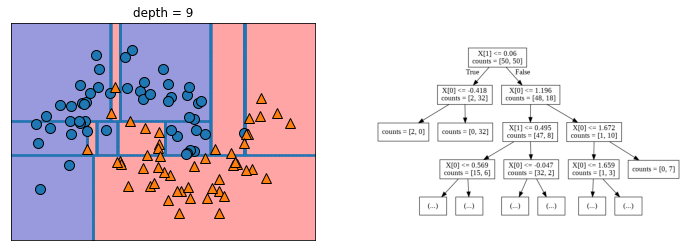

In [ ]:
import mglearn
mglearn.plots.plot_tree_progressive()

질문지의 깊이가 깊어지면 트리 모델의 복잡도가 올라간다.
* 기본적으로 의사결정 트리는 무조건 과대적합을 기본을 삼는다.

# 의사결정나무의 복잡도 제어
* 트리 생성을 일찍 중단( **사전 가지치기(pre pruning)** ) - 사이킷런에서 사용하는 방식
* 트리를 다 만들고 데이터 포인트가 적은 노드를 삭제하거나 병합( **사후 가지치기(post pruning)**)



In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=42
)

tree = DecisionTreeClassifier(random_state=0) # 질문지 선정을 항상 같게 하기 위해서 ( 항상 동일한 feature로 질문지를 생성 )
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


## 사전 가지치기 적용
`max_depth` 하이퍼 파라미터를 사용하여 사전에 최대 질문 깊이를 조절할 수 있다. -> 복잡도를 조절

In [ ]:
# max_depth : 하이퍼 파라미터 max_depth : 하이퍼 파라미터
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


## 트리의 특성 중요도 ( feature importance )
질문지를 만들기 위해 선택된 특성이 예측을 하기 위해 얼마나 중요한 특성인가

In [ ]:
print("특성 중요도 : \n{}".format(tree.feature_importances_))

특성 중요도 : 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [ ]:
print("특성 중요도의 총 합 : \n{}".format(tree.feature_importances_.sum()))

특성 중요도의 총 합 : 
1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 특성 중요도 시각화
def plot_feature_importance_cancer(model):
  plt.figure(figsize=(20, 10))
  n_features = cancer.data.shape[1]

  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature Importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)

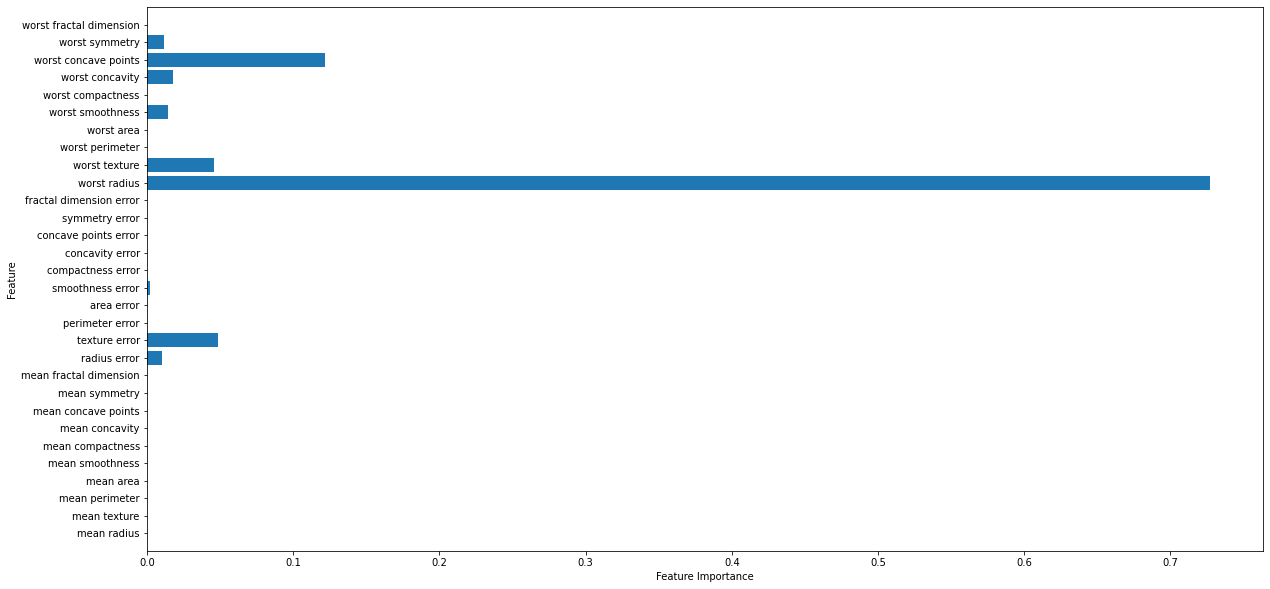

In [ ]:
plot_feature_importance_cancer(tree)

Feature importances: [0. 1.]


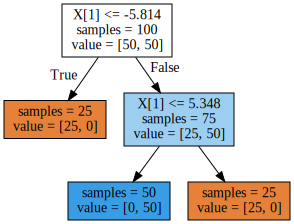

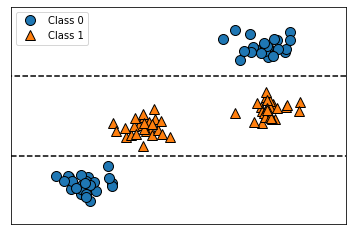

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

`feature_importance`에서 선택이 안된 특성이라고 해서 중요하지 않은 특성이라고 생각하는 건 - 섣부른 판단이다.

## 결정 회귀 트리

In [ ]:
import pandas as pd

ram_prices = pd.read_csv("ram_price.csv")
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


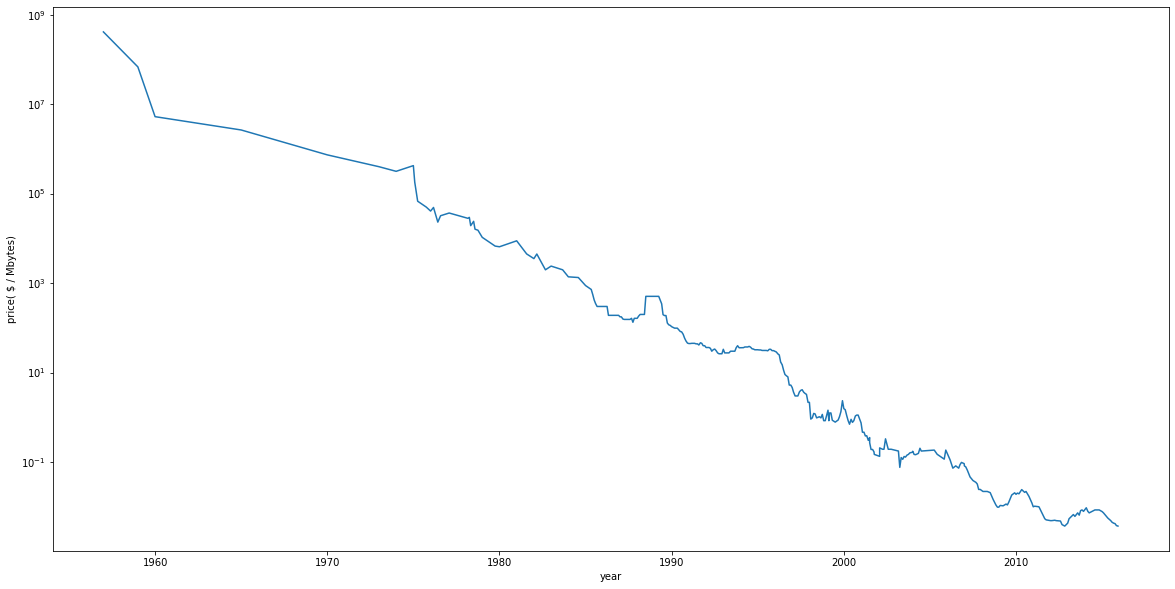

In [ ]:
plt.figure(figsize=(20, 10))

# semilogy : y축 스케일 조정
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price( $ / Mbytes)")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년도 이전 데이터를 훈련 데이터로, 2000년 이후 데이터를 테스트 데이터로
data_train = ram_prices[ram_prices.date < 2000]
data_test  = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 하기 위해 날짜 특성만을 사용
data_train.shape

(202, 3)

In [ ]:
X_train = data_train.date
X_train.shape # 1차원 벡터( 1차원 배열 ) # 행 처럼 표기가 되지만 일단 열벡터가 맞기는 합니다.

(202,)

In [ ]:
# 2차원 배열을 이용해 열벡터로 표현해야만 사이킷 런 등 머신러닝 라이브러리에 들어갈 수 있다.
X_train = X_train[:, np.newaxis]
X_train.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


(202, 1)

In [ ]:
X_train[: 3]

array([[1957.],
       [1959.],
       [1960.]])

In [ ]:
y_train = data_train.price
y_train = np.log(y_train) # 값의 편차를 줄이기 위해 log 사용

In [ ]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
lin_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# 예측용 데이터 ( 전체 기간 )

# 예측용, 테스트용 데이터는 무조건 train 데이터와 shape[-1]의 값이 똑같아야 한다.
X_all = ram_prices.date[:, np.newaxis] # (???, 1)

# 전체 데이터에 대한 트리, 선형회귀의 예측
pred_tree = tree.predict(X_all)
pred_lr   = lin_reg.predict(X_all)

# semilogy 시각화를 사용할 것이기 때문에 로그스케일의 값을 원래대로 복구해주기
price_tree = np.exp(pred_tree)
price_lr   = np.exp(pred_lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


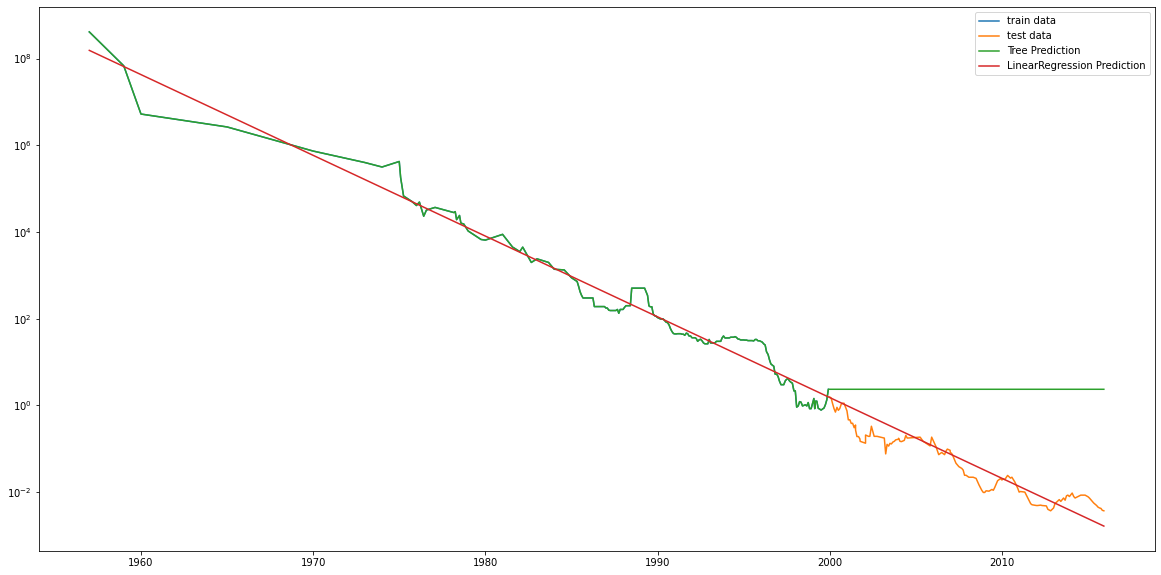

In [ ]:
plt.figure(figsize=(20, 10))

# train / test 따로따로 시각화
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")

# 모델에 의해서 예측된 값을 시각화
plt.semilogy(ram_prices.date, price_tree, label="Tree Prediction")
plt.semilogy(ram_prices.date, price_lr,   label="LinearRegression Prediction")

plt.legend()
plt.show()

# 앙상블 모델 알아보기
## 랜덤 포레스트 ( Random Forest )
  * 과대적합이 되어있는 트리를 여러개 준비한다.(`n_estimators`)
  * 과대적합된 트리를 **각각 다른 방향**으로 예측을 하게 한다.
    * 각각 다른 방향 : **무작위 특성**을 활용해서 과대적합된 상태의 예측을 한다.
  * **무작위 특성** : 무작위로 `feature`를 원본 데이터로부터 선택 - **부트스트랩 샘플링(Bootstrap Sampling)**
  * 부스트스랩 샘플링은 전체 데이터 특성(feature)에서 무작위로 의사결정트리를 위한 feature로 선정하는 방식

### 랜덤 포레스트의 주요 하이퍼 파라미터
* `n_estimators` : 랜덤 포레스트에서 사용할 나무의 개수. 나무가 많아지면 복잡도가 증가
* `max_features` : 부스트스랩 샘플링에 영향을 미친다. **나무에 사용할 샘플의 최대 개수(가짓수)**
  * `max_features`가 원본 데이터 전체 특성과 **같으면** 무작성이 안들어 간다. 모든 나무가 똑같은 예측을 하게 된다.
  * `max_features`가 1이면 완전 무작위가 된다. 하나의 트리에 하나의 특성이 여러개 등록될 수도 있다.

### 부트스트랩 샘플링의 원리
```python

features = ['a','b','c','d','e']

group1 = ['a','b','c','d']
group2 = ['a','b','b','c']
...

```

사이킷런의 공식 문서에서는 알아서 `max_features`를 조절할 수 있도록 `auto`를 사용 하는 것을 권장!

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

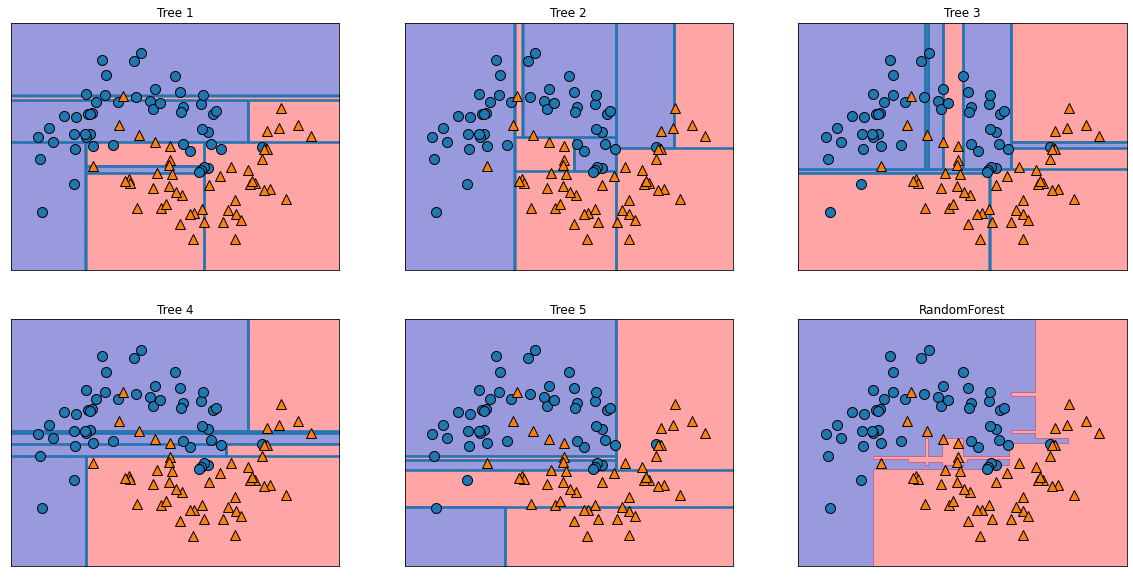

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i+1))
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("RandomForest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

## 유방암 데이터셋

In [ ]:
# 유방암 데이터셋 불러오기
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=0
)

forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 0.998
테스트 세트 정확도 : 0.944


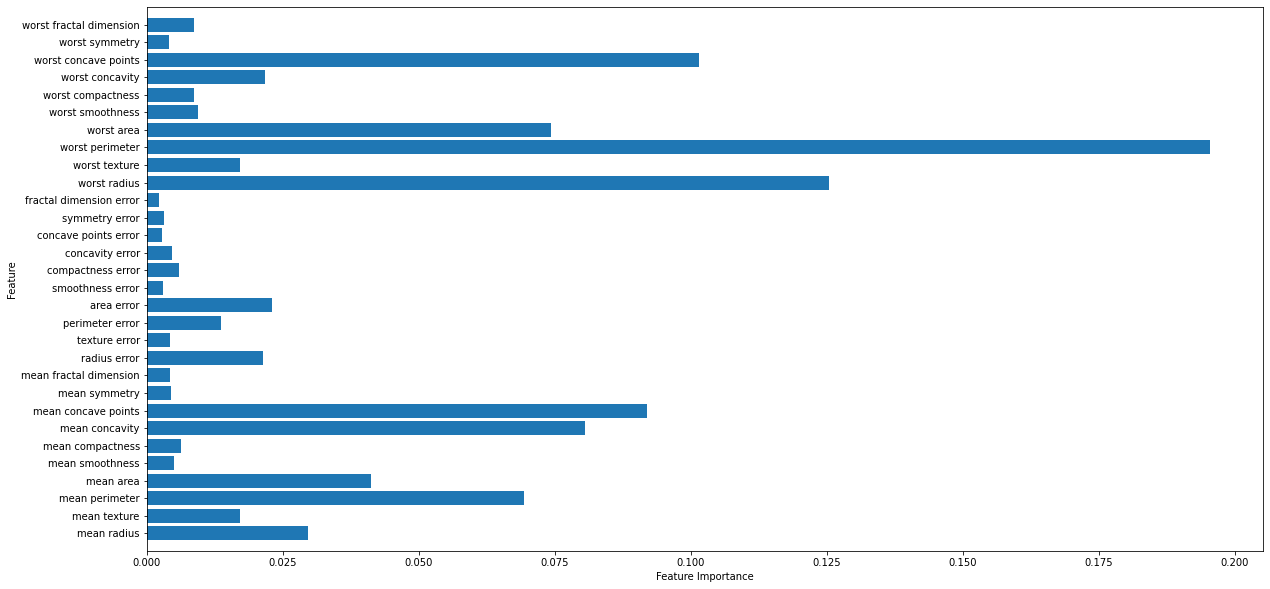

In [ ]:
# 특성 중요도 시각화
plot_feature_importance_cancer(forest)

# 그라디언트 부스팅 회귀 트리
* 학습이 약한 상태에서 강한 상태로 점점 바뀌어가는 알고리즘
* 랜덤 포레스트의 반대되는 개념
  * 랜덤 포레스트는 과대적합된 트리를 활용
  * 그라디언트 부스팅 회귀 트리는 과소적합된 트리를 활용
* 과소적합된 트리를 여러개 이어가면서 학습시키는 방법

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.958


gbrt는 복잡도를 조절하기 위한 중요한 하이퍼 파라미터
* 나무 개수(`n_estimators`)
* 나무의 질문 깊이(`max_depth`)

In [ ]:
gbrt

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# 그라디언트 부스팅 회귀트리의 복잡도는 max_depth, learning rate로 조절이 가능하다.
gbrt = GradientBoostingClassifier(max_depth=1, random_state=0).fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.995
테스트 세트 정확도 : 0.965


In [ ]:
# learning_rate를 조절해서 복잡도를 조절
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0).fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.995
테스트 세트 정확도 : 0.944


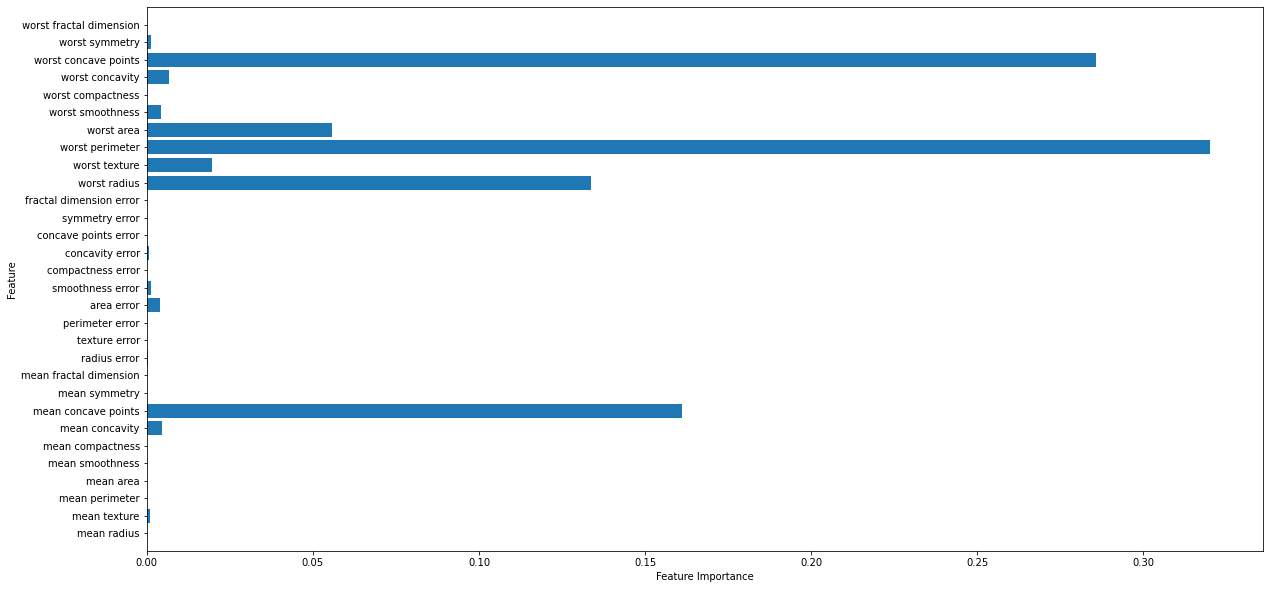

In [ ]:
gbrt = GradientBoostingClassifier(max_depth=1, random_state=0).fit(X_train, y_train)

plot_feature_importance_cancer(gbrt)

# 랜덤 포레스트의 장단점
* 장점
  * 랜덤 포레스트는 머신러닝의 교과서라고도 할 수 있는 알고리즘
  * 초보자도 굉장히 쉽게 이해할 수 있고, 사용할 수 있으며, 스케일링 등을 하지 않아도 웬만한 성능을 보장
  * 데이터 분석 및 레포트 작성에도 굉장히 유리
  * **딥러닝**은 성능은 좋은데 데이터에 대한 해석이 어려워요
  * **랜덤 포레스트는** 성능은 딥러닝 보다는 뒤쳐지지만 데이터의 해석이 뛰어나요
  * 딥러닝 모델 + 랜덤 포레스트 모델을 합친 방식의 모델도 사용
* 단점
  * 트리를 여러개 훈련을 시켜서 평균을 내기 때문에 트리가 많아지면 훈련시간이 굉장히 많이 걸릴 수도 있다.
  * 텍스트 데이터 같은 차원이 많은데 희소한 데이터에는 잘 작동하지 않습니다. ( 희소데이터가 많은 경우에는 잘 작동하지 못한다. )

## 그라디언트 부스팅 회귀 트리의 장단점
* 장점
  * 연속적인 특성에서도 잘 작동한다. ( 연관된 특성이 많을 때 )
  * 성능이 좋다.
* 단점
  * 매개변수에 매우 민감하다.
  * `n_estimators`가 너무 큰 경우 과대적합의 위험성이 있다.
  * 속도가 제일 느리다.

보통 설정하는 `max_depth`는 `1~5`이다. 5를 넘어가지 않도록 설정하는 것이 일반적
